# 项目：用线性回归预测房价数据

## 分析目标

此数据分析报告的目的是，基于已有的房屋销售价格，以及有关该房屋的属性，进行线性回归分析，从而利用得到的线性回归模型，能对以下未知售价的房屋根据属性进行价格预测：

面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

## 简介

数据集`house_price.csv`记录了超过五百栋房屋的交易价格，以及房屋的相关属性信息，包括房屋面积、卧室数、厕所数、楼层数、是否位于主路、是否有客房，等等。

`house_price.csv`每列的含义如下：
- price：房屋出售价格
- area：房屋面积，以平方英尺为单位
- bedrooms：卧室数
- bathrooms：厕所数
- stories：楼层数
- mainroad：是否位于主路
   - yes  是
   - no	  否
- guestroom：是否有客房
   - yes  是
   - no	  否
- basement：是否有地下室
   - yes  是
   - no	  否
- hotwaterheating：是否有热水器
   - yes  是
   - no	  否
- airconditioning：是否有空调
   - yes  是
   - no	  否
- parking：车库容量，以车辆数量为单位
- prefarea：是否位于城市首选社区
   - yes  是
   - no	  否
- furnishingstatus：装修状态
   - furnished       精装
   - semi-furnished	 简装
   - unfurnished     毛坯

# 导入数据

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_house_price = pd.read_csv('./house_price.csv')

# 评估和清理数据

In [3]:
original_house_price.sample(10)
# 没有结构性问题.

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
435,3290000,4040,2,1,1,yes,no,no,no,no,0,no,unfurnished
413,3430000,1950,3,2,2,yes,no,yes,no,no,0,yes,unfurnished
457,3115000,3000,3,1,1,no,no,no,no,yes,0,no,unfurnished
414,3423000,4040,2,1,1,yes,no,no,no,no,0,no,unfurnished
218,4830000,4815,2,1,1,yes,no,no,no,yes,0,yes,semi-furnished
516,2450000,3240,2,1,1,no,yes,no,no,no,1,no,unfurnished
104,6195000,5500,3,2,1,yes,yes,yes,no,no,2,yes,furnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
299,4200000,7000,3,1,1,yes,no,no,no,no,3,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished


In [4]:
# 评估内容问题.
original_house_price.info()
# 无空缺,但所有的分类变量需要更改.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
cleaned_house_price = original_house_price.copy()

In [6]:
cleaned_house_price['mainroad'] = cleaned_house_price['mainroad'].astype('category')
cleaned_house_price['guestroom'] = cleaned_house_price['guestroom'].astype('category')
cleaned_house_price['basement'] = cleaned_house_price['basement'].astype('category')
cleaned_house_price['hotwaterheating'] = cleaned_house_price['hotwaterheating'].astype('category')
cleaned_house_price['airconditioning'] = cleaned_house_price['airconditioning'].astype('category')
cleaned_house_price['prefarea'] = cleaned_house_price['prefarea'].astype('category')
cleaned_house_price['furnishingstatus'] = cleaned_house_price['furnishingstatus'].astype('category')
cleaned_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


In [7]:
# 重复值检查.
cleaned_house_price.duplicated().sum()

np.int64(0)

In [8]:
# 不一致值检查.包括所有分类变量.
cleaned_house_price['mainroad'].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [9]:
cleaned_house_price['guestroom'].value_counts()

guestroom
no     448
yes     97
Name: count, dtype: int64

In [10]:
cleaned_house_price['basement'].value_counts()

basement
no     354
yes    191
Name: count, dtype: int64

In [11]:
cleaned_house_price['hotwaterheating'].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

In [12]:
cleaned_house_price['airconditioning'].value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

In [13]:
cleaned_house_price['prefarea'].value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

In [14]:
cleaned_house_price['furnishingstatus'].value_counts()
# 不存在不一致数据.

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [15]:
# 无效或错误数据.
cleaned_house_price.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# 探索数据

In [16]:
cleaned_house_price.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
439,3255000,3930,2,1,1,no,no,no,no,no,0,no,unfurnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished
202,4900000,4120,2,1,1,yes,no,yes,no,no,1,no,semi-furnished
397,3500000,5900,2,1,1,yes,no,no,no,no,1,no,furnished
256,4480000,4000,3,1,2,yes,no,no,no,no,2,no,furnished


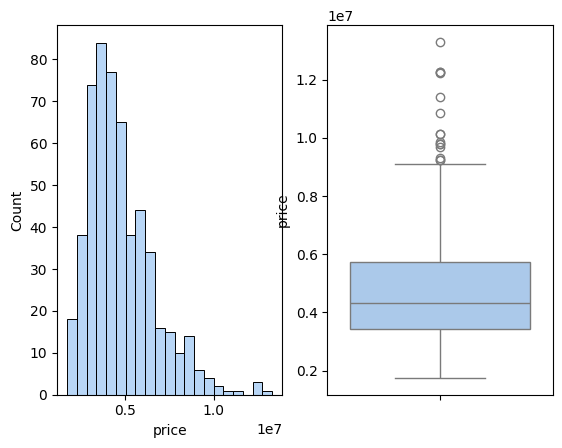

In [17]:
# 先看看房价数据情况.
sns.set_palette('pastel')
figure, axes = plt.subplots(1,2)
sns.histplot(cleaned_house_price, x = 'price', ax = axes[0])
sns.boxplot(cleaned_house_price, y = 'price', ax = axes[1])
plt.show()
# 中位数在偏下面,少数特别高.呈右偏态分布.

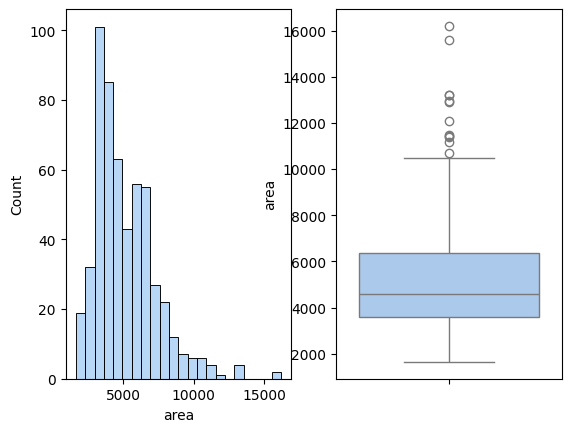

In [18]:
# 再看看面积的分布情况.
figure, axes = plt.subplots(1,2)
sns.histplot(cleaned_house_price, x = 'area', ax = axes[0])
sns.boxplot(cleaned_house_price, y = 'area', ax = axes[1])
plt.show()
# 面积的中位数也在四千多一点,呈现右偏态分布.

In [19]:
# 后续的  bedrooms：卧室数, bathrooms：厕所数, stories：楼层数  .都可以绘制直方图和箱型图来看看具体的中位数和分布情况.

### 现在来探索房价是否与下面的各种属性有关.
price：房屋出售价格
area：房屋面积，以平方英尺为单位
bedrooms：卧室数
bathrooms：厕所数
stories：楼层数
mainroad：是否位于主路
yes 是
no 否
guestroom：是否有客房
yes 是
no 否
basement：是否有地下室
yes 是
no 否
hotwaterheating：是否有热水器
yes 是
no 否
airconditioning：是否有空调
yes 是
no 否
parking：车库容量，以车辆数量为单位
prefarea：是否位于城市首选社区
yes 是
no 否
furnishingstatus：装修状态
furnished 精装
semi-furnished 简装
unfurnished 毛坯

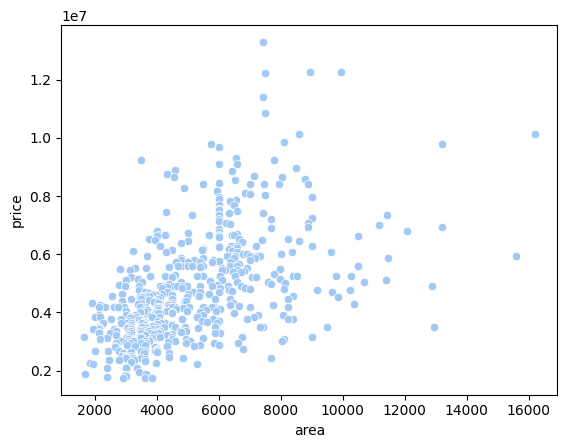

In [20]:
sns.scatterplot(cleaned_house_price, x = 'area', y = 'price')
plt.show()
# 大致上是相关的.面积越大价格越高,但不清楚是否是强相关.

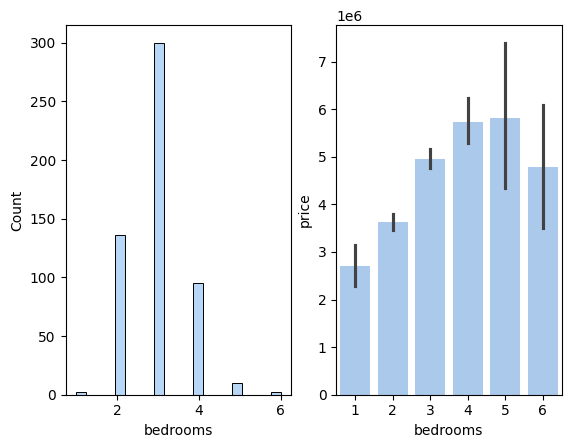

In [21]:
figure, axes = plt.subplots(1,2)
sns.histplot(cleaned_house_price, x = 'bedrooms', ax = axes[0])
sns.barplot(cleaned_house_price, x = 'bedrooms', y = 'price', ax = axes[1])
plt.show()
# 可以大致看出卧室集中在2-4个,在卧室数量小于五个时,价格会随着卧室数量的增加而增高.

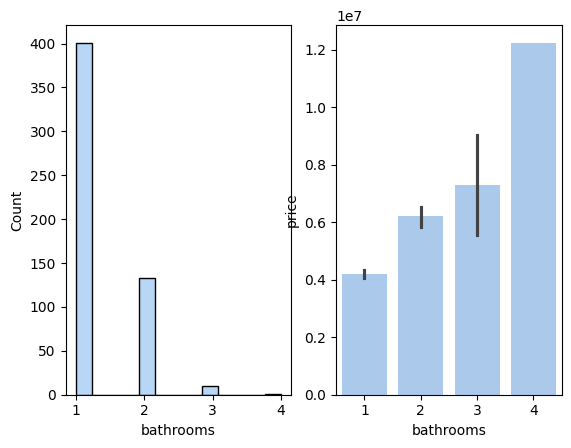

In [22]:
# bathrooms和房价.
figure, axes = plt.subplots(1,2)
sns.histplot(cleaned_house_price, x = 'bathrooms', ax = axes[0])
sns.barplot(cleaned_house_price, x = 'bathrooms', y = 'price', ax =axes[1])
plt.show()
# 可以看出厕所主要是1个或两个,厕所增加房价会上升.

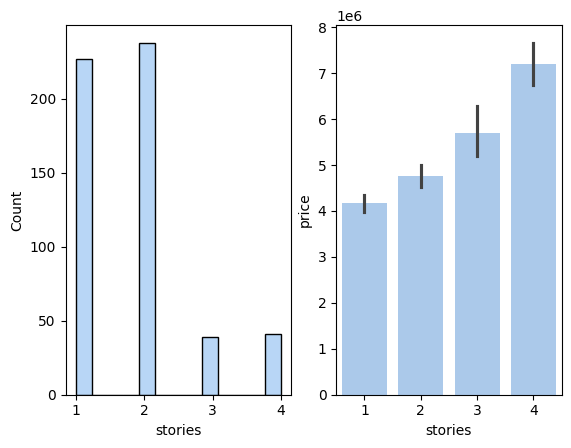

In [23]:
# stories楼层数与房价的关系.
figure, axes = plt.subplots(1,2)
sns.histplot(cleaned_house_price, x = 'stories', ax = axes[0])
sns.barplot(cleaned_house_price, x = 'stories', y = 'price', ax = axes[1])
plt.show()
# 可以看出楼层数一般在一层和二层,随着楼层数上升房价上升.

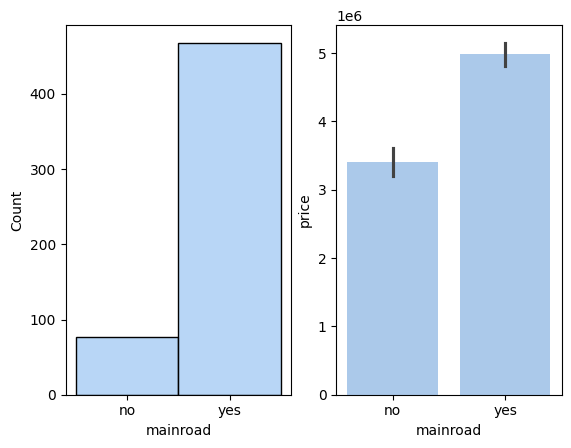

In [24]:
# mainroad：是否位于主路. 与房价的关系.
figure, axes = plt.subplots(1,2)
sns.histplot(cleaned_house_price, x = 'mainroad', ax = axes[0])
sns.barplot(cleaned_house_price, x = 'mainroad', y = 'price', ax = axes[1])
plt.show()
# 可以看出多数房子位于主路,且位于主路会导致房价更高.

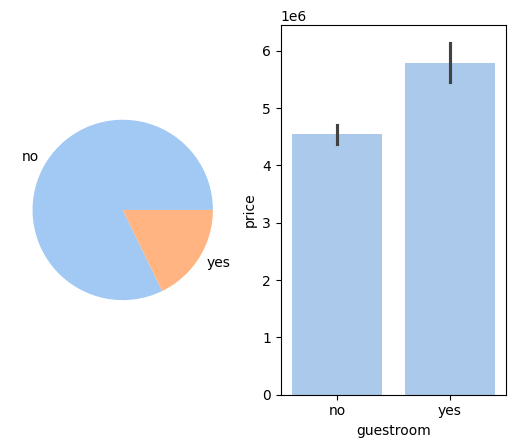

In [25]:
# guestroom是否有客房对房价的影响.这里不再是之前的离散型数值变量,可以用直方图观察离散型数值变量的变化特点,而是分类变量,有或是没有,用饼图.
figure, axes = plt.subplots(1,2)
guestroom_counts = cleaned_house_price['guestroom'].value_counts()
guestroom_index = guestroom_counts.index
axes[0].pie(guestroom_counts, labels = guestroom_index)
sns.barplot(cleaned_house_price, x = 'guestroom', y = 'price', ax = axes[1])
plt.show()
# 可以看出多数是无客房的且有客房的房子价格会更高.

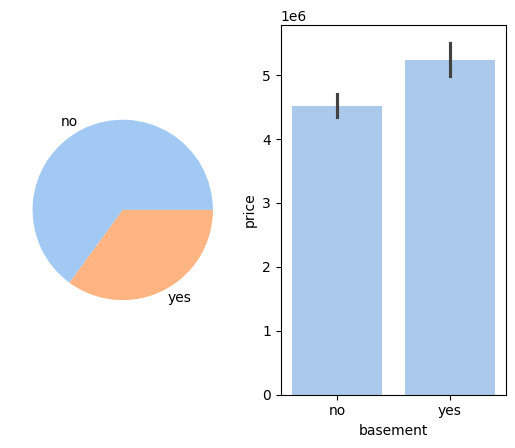

In [26]:
# basement：是否有地下室  对房价的影响.同样应该用饼图.
figure, axes = plt.subplots(1,2)
basement_counts = cleaned_house_price['basement'].value_counts()
basement_index = basement_counts.index
axes[0].pie(basement_counts, labels = basement_index)
sns.barplot(cleaned_house_price, x = 'basement', y = 'price', ax = axes[1])
plt.show()
# 可以看处多数房子没有地下室,且有地下室的房子房价更高.

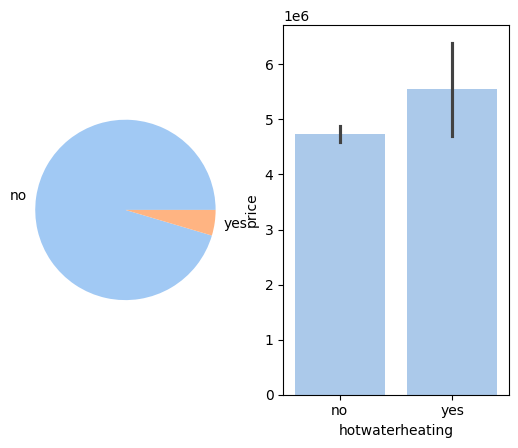

In [27]:
# hotwaterheating热水器与房价的关系.
figure, axes = plt.subplots(1,2)
hotwaterheating_counts = cleaned_house_price['hotwaterheating'].value_counts()
hotwaterheating_counts_index = hotwaterheating_counts.index
axes[0].pie(hotwaterheating_counts, labels = hotwaterheating_counts_index)
sns.barplot(cleaned_house_price, x = 'hotwaterheating', y = 'price', ax = axes[1])
plt.show()
# 可以看处多数房子没有热水器,有热水器的房价更高.

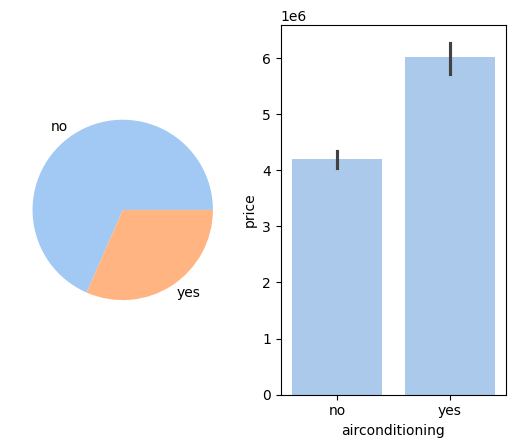

In [28]:
# airconditioning是否有空调,对房价的影响.
figure, axes = plt.subplots(1,2)
airconditioning_counts = cleaned_house_price['airconditioning'].value_counts()
airconditioning_counts_index = airconditioning_counts.index
axes[0].pie(airconditioning_counts, labels = airconditioning_counts_index)
sns.barplot(cleaned_house_price, x = 'airconditioning', y = 'price', ax = axes[1])
plt.show()
# 可以看出多数房子是没有空调的,有空调的房价会更贵.

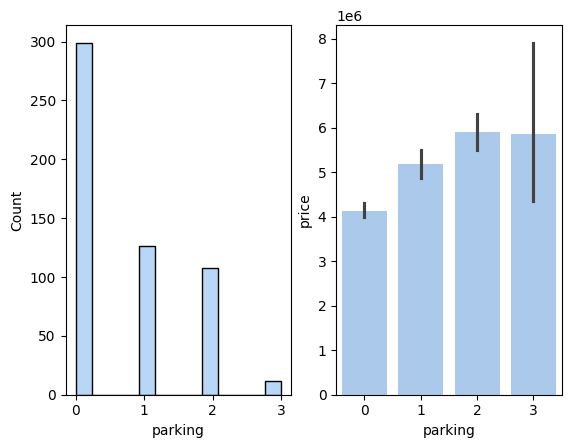

In [29]:
# parking车库容量对房价的影响.
figure, axes = plt.subplots(1,2)
sns.histplot(cleaned_house_price, x = 'parking', ax = axes[0])
sns.barplot(cleaned_house_price, x = 'parking', y = 'price', ax = axes[1])
plt.show()
# 可以看出多数房子无车库,房价随车库数量上升而上升.

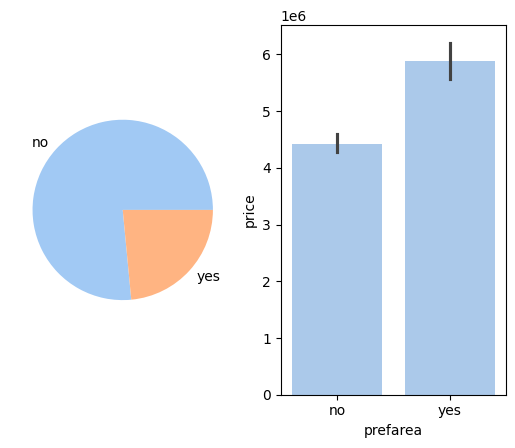

In [30]:
# prefarea是否位于城市首选社区对房价的影响.
figure, axes = plt.subplots(1,2)
prefarea_counts = cleaned_house_price['prefarea'].value_counts()
prefarea_counts_index = prefarea_counts.index                                                               
axes[0].pie(prefarea_counts, labels = prefarea_counts_index)
sns.barplot(cleaned_house_price, x = 'prefarea', y = 'price', ax = axes[1])
plt.show()
# 可以看出多数房子不在首选社区,且在首选社区的房价更高.

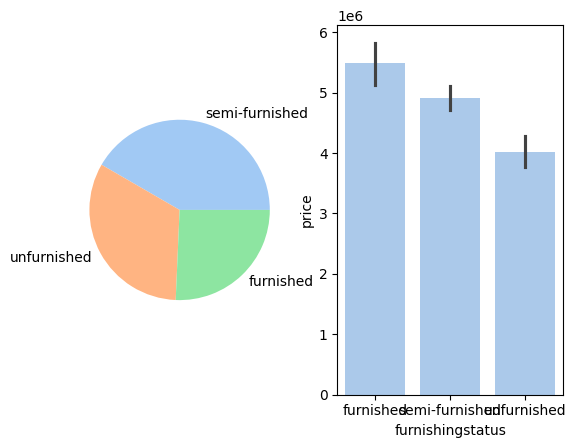

In [31]:
# furnishingstatus装修状态对房价的影响.
figure, axes = plt.subplots(1,2)
furnishingstatus_counts = cleaned_house_price['furnishingstatus'].value_counts()
furnishingstatus_counts_index = furnishingstatus_counts.index
axes[0].pie(furnishingstatus_counts, labels = furnishingstatus_counts_index)
sns.barplot(cleaned_house_price, x = 'furnishingstatus', y = 'price', ax = axes[1])
plt.show()
# 三种装修方式基本占比差不多,随着装修的变好,房价变高.

In [32]:
import statsmodels.api as sm

In [33]:
# 在线性回归分析之前,需要新建虚拟变量,所以需要单独一个变量.
lr_house_price = cleaned_house_price.copy()

In [34]:
lr_house_price

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [35]:
# 创建虚拟变量.但要记得丢掉虚拟变量yes/no两列的第一列.
lr_house_price = pd.get_dummies(lr_house_price, columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], drop_first = True, dtype = int)
lr_house_price

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [36]:
y = lr_house_price['price']

In [37]:
x = lr_house_price.drop('price', axis = 1)

In [38]:
# 防止共线性问题,需要检查除了price以外的其他所有自变量之间的相关性.大于0.8为强相关性.
x.corr().abs() > 0.8
# 发现除了自己跟自己是强相关外,其他都是小于0.8的非强相关,没有共线性问题.

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False
stories,False,False,False,True,False,False,False,False,False,False,False,False,False
parking,False,False,False,False,True,False,False,False,False,False,False,False,False
mainroad_yes,False,False,False,False,False,True,False,False,False,False,False,False,False
guestroom_yes,False,False,False,False,False,False,True,False,False,False,False,False,False
basement_yes,False,False,False,False,False,False,False,True,False,False,False,False,False
hotwaterheating_yes,False,False,False,False,False,False,False,False,True,False,False,False,False
airconditioning_yes,False,False,False,False,False,False,False,False,False,True,False,False,False


In [39]:
# 给线性方程添加截距.
x = sm.add_constant(x)
x

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,1.0,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,1.0,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,1.0,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,1.0,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.0,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1.0,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1.0,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1.0,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [40]:
# 创建模型,使用OSL(Y,X) 注意顺序,是y在前面.
model = sm.OLS(y, x).fit()

In [41]:
# 查看结果.
model.summary()
# 自变量系数在第二个表格.
# P值假设在H0成立(该自变量与因变量无关)的前提下,出现该相关系数的概率,假设alpha = 0.05 , 则P值应大于0.05.  换句话说,自变量与因变量无关,系数为零,则P>0.05 , 当P<0.05时,说明系数有效,自变量与因变量相关.
# 看到的P值 const,bedrooms,furnishingstatus_semi-furnished	都大于了0.05 , 系数应该为0 ,应该去掉这些自变量再建立回归方程.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          9.07e-123
Time:                        16:32:18   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.277e+04   2.64e+05      0.162      0.872   -4.76e+05    5.62e+05
area                              244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms                         1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms                        9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories                          4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
parking                          2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
mainroad_yes                     4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom_yes                    3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement_yes                     3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
hotwaterheating_yes              8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
airconditioning_yes               8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
prefarea_yes                     6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
furnishingstatus_semi-furnished -4.634e+04   1.17e+05     -0.398      0.691   -2.75e+05    1.83e+05
furnishingstatus_unfurnished    -4.112e+05   1.26e+05     -3.258      0.001   -6.59e+05   -1.63e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
x = x.drop(['const', 'bedrooms', 'furnishingstatus_semi-furnished'], axis = 1)

In [43]:
model = sm.OLS(y, x).fit()

In [44]:
model.summary()
# 注意第一张表的R-squared (uncentered)已经从之前的0.682变成了现在的0.957 ,模型的拟合度更高了(越接近1拟合度越高)
# coef为正数显示该自变量会降低房屋因变量的价格.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1088.
Date:                Wed, 26 Feb 2025   Prob (F-statistic):                        0.00
Time:                        16:32:18   Log-Likelihood:                         -8333.5
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     534   BIC:                                  1.674e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           257.5854     22.577     11.409      0.000     213.234     301.936
bathrooms                     1.071e+06   9.27e+04     11.553      0.000    8.89e+05    1.25e+06
stories                       5.084e+05   5.71e+04      8.898      0.000    3.96e+05    6.21e+05
parking                       2.793e+05   5.83e+04      4.794      0.000    1.65e+05    3.94e+05
mainroad_yes                  4.672e+05   1.27e+05      3.679      0.000    2.18e+05    7.17e+05
guestroom_yes                 2.851e+05   1.31e+05      2.172      0.030    2.72e+04    5.43e+05
basement_yes                  4.016e+05   1.07e+05      3.765      0.000    1.92e+05    6.11e+05
hotwaterheating_yes           8.668e+05   2.23e+05      3.884      0.000    4.28e+05    1.31e+06
airconditioning_yes           8.543e+05   1.07e+05      7.952      0.000    6.43e+05    1.07e+06
prefarea_yes                  6.443e+05   1.15e+05      5.594      0.000    4.18e+05    8.71e+05
furnishingstatus_unfurnished -3.493e+05   9.49e+04     -3.679      0.000   -5.36e+05   -1.63e+05
==============================================================================
Omnibus:                       94.840   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.889
Skew:                           0.865   Prob(JB):                     2.01e-55
Kurtosis:                       5.845   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
# 面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。
predict_price = pd.DataFrame({'area':[6500], 'bedrooms':[4], 'bathrooms':[2],
                              'stories':[2], 'mainroad':['no'], 'guestroom':['no'],
                              'basement':['yes'], 'hotwaterheating':['yes'],
                              'airconditioning':['no'], 'parking':[2], 'prefarea':['yes'],
                              'furnishingstatus':['semi-furnished']})
predict_price

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,6500,4,2,2,no,no,yes,yes,no,2,yes,semi-furnished


In [46]:
# 现在要将自变量的分类变量转化成category,否则无法计算.
predict_price['mainroad'] = pd.Categorical(predict_price['mainroad'], categories = ['no', 'yes'])
predict_price['guestroom'] = pd.Categorical(predict_price['guestroom'], categories = ['no', 'yes'])
predict_price['basement'] = pd.Categorical(predict_price['basement'], categories = ['no', 'yes'])
predict_price['hotwaterheating'] = pd.Categorical(predict_price['hotwaterheating'], categories = ['no', 'yes'])
predict_price['airconditioning'] = pd.Categorical(predict_price['airconditioning'], categories = ['no', 'yes'])
predict_price['prefarea'] = pd.Categorical(predict_price['prefarea'], categories = ['no', 'yes'])
# 注意这里categories传入的顺序应该与之前的x里面的表格顺序一致,['furnished','semi-furnished', 'unfurnished'] , 否则后面会出现问题.
predict_price['furnishingstatus'] = pd.Categorical(predict_price['furnishingstatus'], categories = ['furnished', 'semi-furnished', 'unfurnished'])


In [47]:
# 对分类变量引入虚拟变量,将category转化成0和1的数字,以达成计算的目的.
predict_price = pd.get_dummies(predict_price, drop_first = True, 
                               columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                                          'airconditioning', 'prefarea', 'furnishingstatus'], dtype = int)
predict_price.head()


,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,6500,4,2,2,2,0,0,1,1,0,1,1,0


In [48]:
predict_price = predict_price.drop(['bedrooms', 'furnishingstatus_semi-furnished'], axis = 1)
# 与x一致.


In [49]:
predict_value = model.predict(predict_price)
predict_value


0    7.303754e+06
dtype: float64